<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preparing-the-dataset" data-toc-modified-id="Preparing-the-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preparing the dataset</a></span><ul class="toc-item"><li><span><a href="#Subsetting-only-residential-data" data-toc-modified-id="Subsetting-only-residential-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Subsetting only residential data</a></span></li><li><span><a href="#Dropping-NaNs" data-toc-modified-id="Dropping-NaNs-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Dropping NaNs</a></span></li><li><span><a href="#Modifying-variables" data-toc-modified-id="Modifying-variables-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Modifying variables</a></span></li></ul></li><li><span><a href="#Cleaning-and-Initial-EDA" data-toc-modified-id="Cleaning-and-Initial-EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cleaning and Initial EDA</a></span><ul class="toc-item"><li><span><a href="#Dealing-with-outliers" data-toc-modified-id="Dealing-with-outliers-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Dealing with outliers</a></span></li><li><span><a href="#Converting-categorical-variables-to-dummies" data-toc-modified-id="Converting-categorical-variables-to-dummies-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Converting categorical variables to dummies</a></span></li></ul></li><li><span><a href="#EDA-and-feature-engineering" data-toc-modified-id="EDA-and-feature-engineering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA and feature engineering</a></span></li><li><span><a href="#Training-data-split" data-toc-modified-id="Training-data-split-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Training data split</a></span></li><li><span><a href="#Building-an-initial-model" data-toc-modified-id="Building-an-initial-model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Building an initial model</a></span></li><li><span><a href="#Revising-the-model" data-toc-modified-id="Revising-the-model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Revising the model</a></span><ul class="toc-item"><li><span><a href="#Addressing-multicollinearity" data-toc-modified-id="Addressing-multicollinearity-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Addressing multicollinearity</a></span></li><li><span><a href="#Removing-high-collinearity-categorical-features" data-toc-modified-id="Removing-high-collinearity-categorical-features-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Removing high-collinearity categorical features</a></span></li></ul></li></ul></div>

In [995]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [996]:
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

In [997]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
raw = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [998]:
raw.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


In [999]:
#safe = raw.copy()

## Preparing the dataset

In [1000]:
data = raw.copy()
data.shape

(1460, 81)

### Subsetting only residential data

We're only interested in the data that relates to residential zoning, completely finished dwellings, and involved a 'normal' sale.

In [1001]:
data = data.loc[data['salecondition'] == 'Normal'] #normal sales
data = data.loc[data['mszoning'].isin(['FV', 'RH', 'RL', 'RP', 'RM'])] #residential zoning
data = data.loc[data['mssubclass'] != 45] #excludes unfinished housing
data = data.loc[data['housestyle'].isin(['1Story', '1.5Fin', '2Story', '2.5Fin', 'SFoyer', 'SLvl'])] 
        #exlcuded unfinished stories

data.shape

(1170, 81)

### Dropping NaNs

In [1002]:
cols_to_be_dropped, rows_to_be_dropped = [], []

for v in data.columns:
    if data[v].isna().sum()/len(data) > 0.1:
        print(v, data[v].isna().sum()/len(data), "**")
        cols_to_be_dropped.append(v)
    elif data[v].isna().sum()/len(data) > 0:
        rows_to_be_dropped.append(v)
        print(v, data[v].isna().sum()/len(data))

lotfrontage 0.20085470085470086 **
alley 0.9435897435897436 **
masvnrtype 0.003418803418803419
masvnrarea 0.003418803418803419
bsmtqual 0.02735042735042735
bsmtcond 0.02735042735042735
bsmtexposure 0.028205128205128206
bsmtfintype1 0.02735042735042735
bsmtfintype2 0.028205128205128206
electrical 0.0008547008547008547
fireplacequ 0.4683760683760684 **
garagetype 0.04871794871794872
garageyrblt 0.04871794871794872
garagefinish 0.04871794871794872
garagequal 0.04871794871794872
garagecond 0.04871794871794872
poolqc 0.9974358974358974 **
fence 0.8008547008547009 **
miscfeature 0.9581196581196582 **


In [1003]:
data.drop(columns = cols_to_be_dropped, inplace=True)
data.dropna(axis=0, inplace=True)
data.shape

(1080, 75)

### Modifying variables

We make initial changes:
* (BsmtFullBath, BsmtHalfBath) and (FullBath, HalfBath) will be combined to BsmtBaths and Baths respectively, which are then changed into categorical variables
* YearBuilt, YearRemodAdd, GarageYrBlt will be used to create new variables that measure years since today (2019) 
* Fireplaces and garagecars will be made a categorical variable


In [1004]:
data['bsmtbath'] = data['bsmtfullbath'] + data['bsmthalfbath']/2
data['bath'] = data['fullbath'] + data['halfbath']/2

data['time_since_house_built'] = 2019 - data['yearbuilt']
data['time_since_house_remod'] = 2019 - data['yearremodadd']
data['time_since_gar_built'] = 2019 - data['garageyrblt']

data['bsmtbath'] = data['bsmtbath'].astype('str')
data['bath'] = data['bsmtbath'].astype('str')
data['fireplaces'] = data['fireplaces'].astype('str')
data['garagecars'] = data['garagecars'].astype('str')

cols_to_be_removed = ['bsmtfullbath', 'bsmthalfbath', 'yearbuilt',
                    'fullbath', 'halfbath', 'yearremodadd', 'garageyrblt']
cols_to_be_added = ['bsmtbath', 'bath', 'time_since_house_built', 'time_since_house_remod', 'time_since_gar_built']

data.drop(columns=cols_to_be_removed, inplace = True)

In [1005]:
x_vars = list(data.columns)
x_vars.remove('saleprice')

x_numerics, x_categorical = [], []

for v in x_vars:
    if (data[v].dtype.name == 'int64' or data[v].dtype.name == 'float64') and v != 'id':
        x_numerics.append(v)
    elif v!= 'id':
        x_categorical.append(v)

## Cleaning and Initial EDA

### Dealing with outliers

We start by plotting histograms of the different continuous variables.

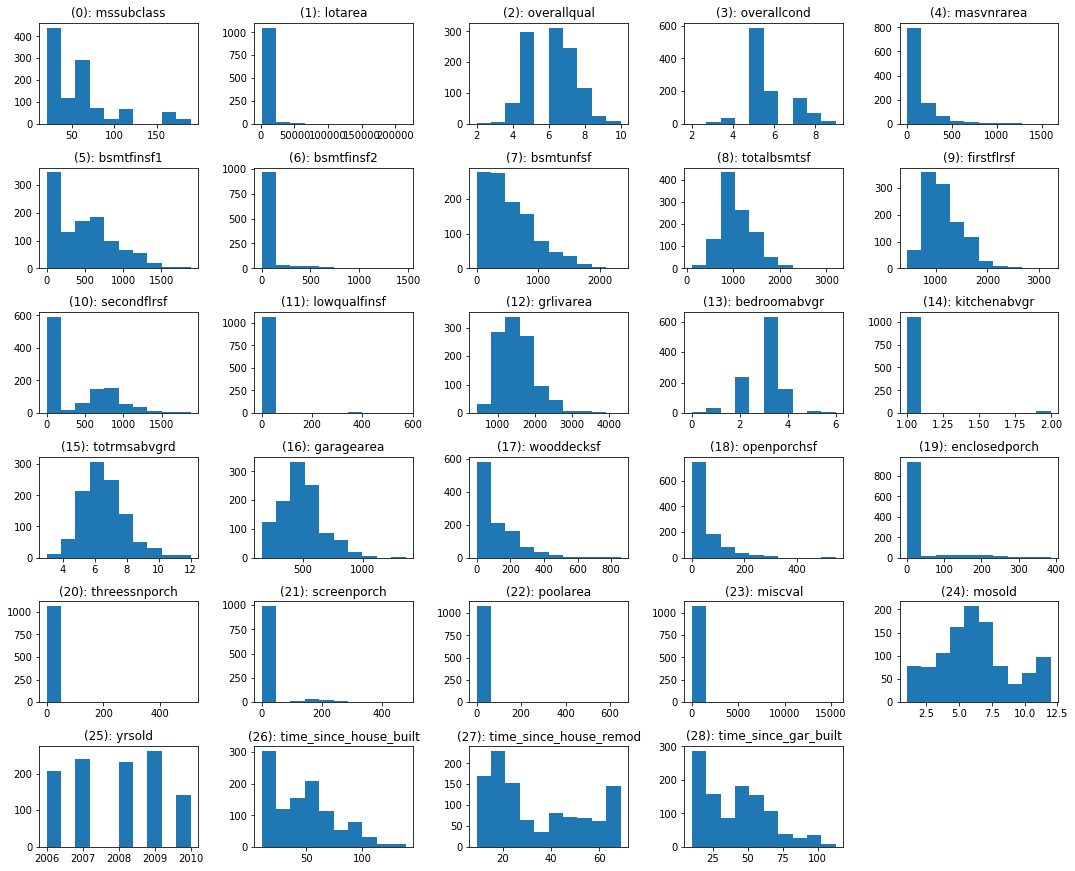

In [1006]:
plt.figure(figsize=(15, 20))

for index, v in enumerate(x_numerics):
    plt.subplot(10, 5, index + 1)
    plt.hist(data[v])
    plt.title("({}): {}".format(index, v))

plt.tight_layout()
plt.show()

We see that `lotfrontage`, `lotarea`, `masvrnarea`, `bstmtfins1`, `bsmtfinsf2`, `totalbsmtsf`, `lowqualfinsf`, `screenporch`, `poolarea`, `miscval` and `screenporch` are heavily left-skewed. We look at the box plots for more information.

My hypothesis is that houses in the 'Residential Low Density' zoning category (aka, estates and spread-out houses) are contributing to the outliers.

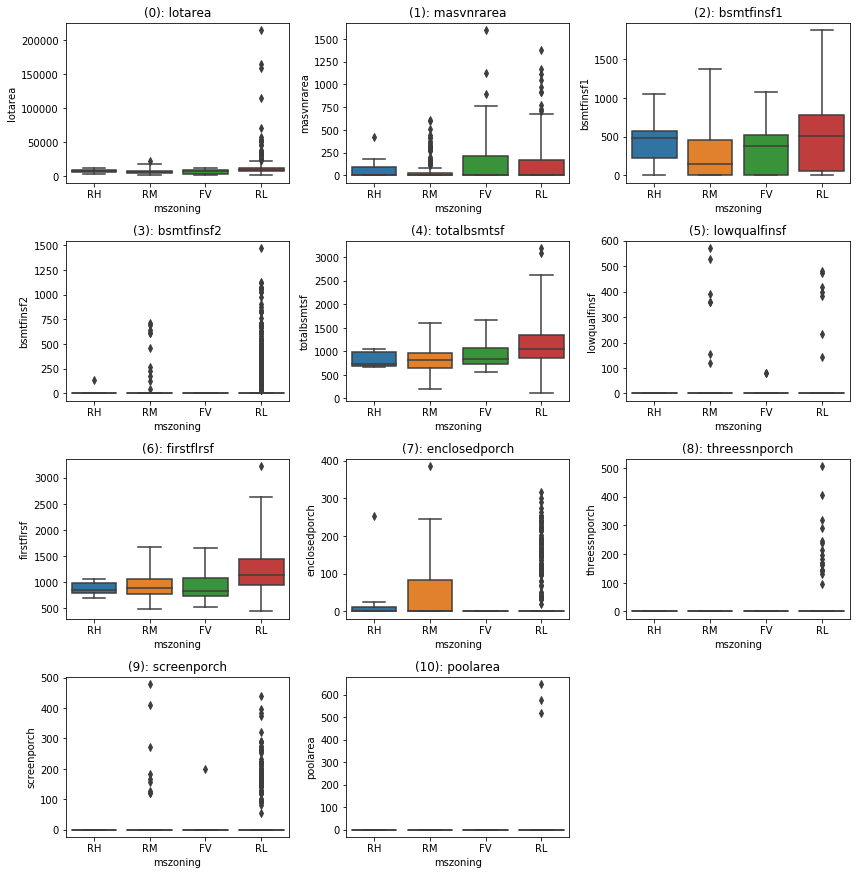

In [1007]:
outlier_cols = ['lotarea', 'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2', 'totalbsmtsf', 'lowqualfinsf', 
                'firstflrsf', 'enclosedporch', 'threessnporch', 'screenporch', 'poolarea']

plt.figure(figsize=(12, 30))

for index, c in enumerate(outlier_cols):
    plt.subplot(10, 3, index + 1)
    sns.boxplot(data = data, x = 'mszoning', y = c, order = ['RH', 'RM', 'FV', 'RL'], whis=3)
    plt.title("({}): {}".format(index, c))

plt.tight_layout()

As suspected, our hypothesis is somewhat true. Houses built in the Low Density zones have (understandably) extremely large lotareas. Unfortunately there isn't a way to tell if these outlying values are accurate. As such, we must remove outliers outside the [2, 98] percentile maintain data validity and still accommodate for high-value homes. 

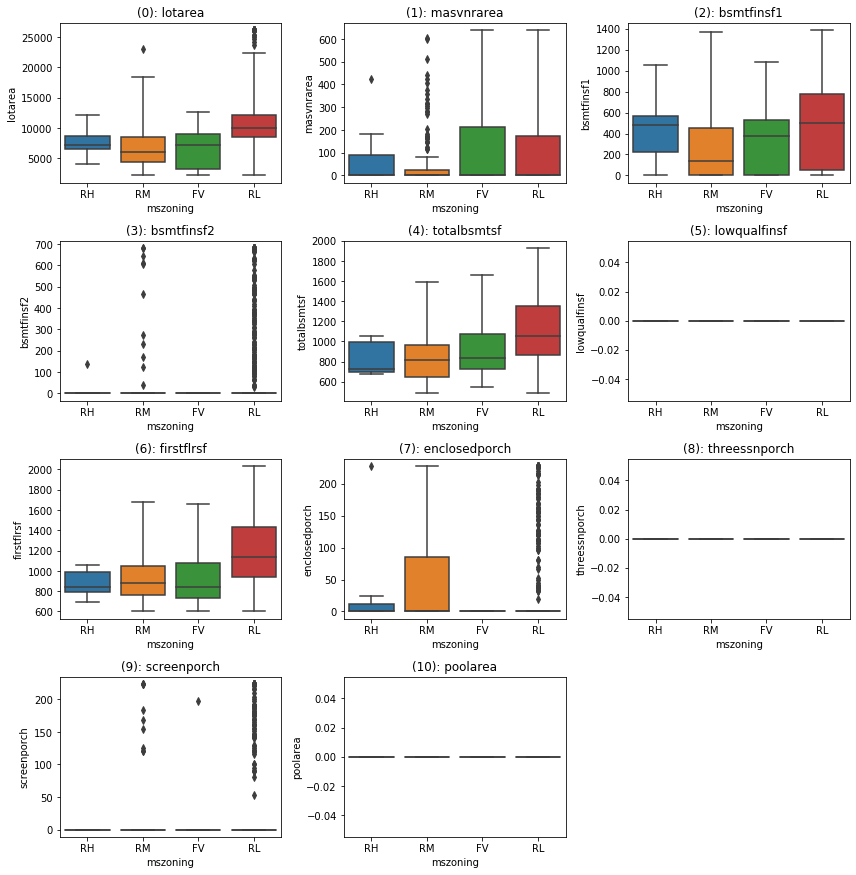

In [1008]:
from scipy.stats.mstats import winsorize

data2 = data.copy()

plt.figure(figsize=(12, 30))
for index, c in enumerate(outlier_cols):
    data2[c] = winsorize(data[c], (.02, .02))
    plt.subplot(10, 3, index + 1)
    sns.boxplot(data = data2, x = 'mszoning', y = c, order = ['RH', 'RM', 'FV', 'RL'], whis=3)
    plt.title("({}): {}".format(index, c))

plt.tight_layout()

In [1009]:
data2['lowqualfinsf'].mean(), data2['poolarea'].mean(), data2['threessnporch'].mean()

(0.0, 0.0, 0.0)

In [1010]:
data['lowqualfinsf'].mean(), data['poolarea'].mean(), data['threessnporch'].mean()

(4.7935185185185185, 1.613888888888889, 3.475925925925926)

These are workable results. It appears that poolarea, threessonporch, and lowqualfinsf have near 0 values. We drop them.

In [1011]:
data2.drop(columns=['lowqualfinsf', 'poolarea', 'threessnporch'], inplace=True)
x_numerics.remove('lowqualfinsf')
x_numerics.remove('poolarea')
x_numerics.remove('threessnporch')

### Converting categorical variables to dummies

In [1012]:
cat = pd.DataFrame()

x_categorical_dummies = []

for c in x_categorical:
    temp = pd.get_dummies(data2[c], drop_first=True, prefix=c)
    x_categorical_dummies += list(temp.columns)
    
    cat = pd.concat([cat, temp], axis=1)

data2 = pd.concat([data2, cat], axis=1)
data2.drop(columns = x_categorical, inplace = True)
data2.shape

(1080, 210)

## EDA and feature engineering

Since it is going to extremely time-consuming to look at 211 columns, we start by looking at the correlations of the numeric variables with target variable. We start with the numerical variables:

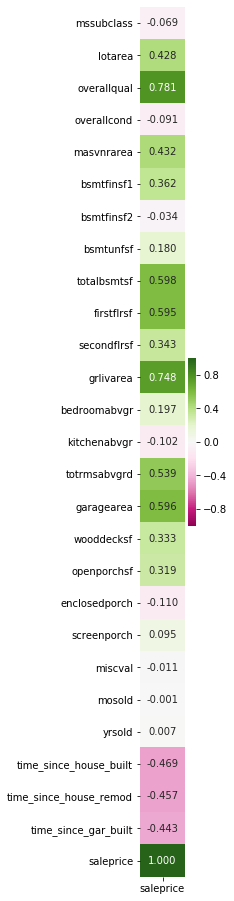

In [1013]:
from numpy import tril

cols = x_numerics + ['saleprice']

matrix = np.tril(data2[cols].corr())

plt.figure(figsize=(1, 16))

ax = sns.heatmap(data2[cols].corr()['saleprice'].to_frame(), annot=True, fmt='.3f', cmap='PiYG',
                 center=0, vmax=1, vmin=-1)

We start by looking at the distributions of the variables with a absolute correlation >= 0.25. As such, these have a relatively high correlation with the target variable, and might be possible explanatory features.

In [1299]:
poss_features = []

corr = data2.corr()

for v in x_numerics:
    if abs(data2.corr()['saleprice'][v]) >= 0.5:
        poss_features.append(v)
        print("{}, corr: {}".format(v, data2.corr()['saleprice'][v]))
        
poss_features

overallqual, corr: 0.7814556315893234
totalbsmtsf, corr: 0.5977578406246782
firstflrsf, corr: 0.5952442941491638
grlivarea, corr: 0.7484607034255527
totrmsabvgrd, corr: 0.5388600507212824
garagearea, corr: 0.5957705661297502


['overallqual',
 'totalbsmtsf',
 'firstflrsf',
 'grlivarea',
 'totrmsabvgrd',
 'garagearea']

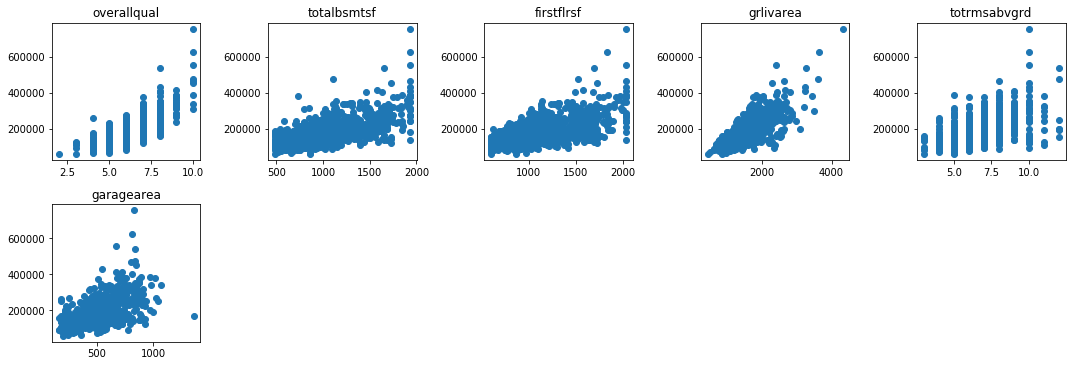

In [1300]:
plt.figure(figsize=(15, 10))

for index, v in enumerate(poss_features):
    plt.subplot(4, 5, index + 1)
    plt.scatter(data2[v], data2['saleprice'])
    plt.title(v)

plt.tight_layout()
plt.show()

We have our initial set of 15 explanatory numerical variables. We do the same with categorical variables.

In [1301]:
for v in x_categorical_dummies:
    if abs(data2.corr()['saleprice'][v]) >= 0.5:
        poss_features.append(v)
        print("{}, corr: {} **".format(v, data2.corr()['saleprice'][v]))

exterqual_TA, corr: -0.5744876241281602 **
kitchenqual_TA, corr: -0.5182441426562464 **
garagecars_3, corr: 0.5759168004531827 **


In [1302]:
initial_feauts = poss_features.copy()

len(poss_features), poss_features

(9,
 ['overallqual',
  'totalbsmtsf',
  'firstflrsf',
  'grlivarea',
  'totrmsabvgrd',
  'garagearea',
  'exterqual_TA',
  'kitchenqual_TA',
  'garagecars_3'])

We have our initial list of 20 explanatory variables.

## Building an initial model

(723, 9) (357, 9) (723,) (357,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              saleprice   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              3336.
Date:                Tue, 07 Jan 2020   Prob (F-statistic):                        0.00
Time:                        04:15:55   Log-Likelihood:                         -8470.9
No. Observations:                 723   AIC:                                  1.696e+04
Df Residuals:                     714   BIC:                                  1.700e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
overallqual     1.262e+04    980.062     12.879      0.000    1.07e+04    1.45e+04
totalbsmtsf       42.7147      7.099      6.017      0.000      28.778      56.652
firstflrsf        -4.3514      7.288     -0.597      0.551     -18.660       9.957
grlivarea         73.8268      4.702     15.702      0.000      64.596      83.058
totrmsabvgrd   -6848.6039   1266.927     -5.406      0.000   -9335.952   -4361.256
garagearea        12.7227      8.475      1.501      0.134      -3.915      29.361
exterqual_TA   -9058.6894   3143.086     -2.882      0.004   -1.52e+04   -2887.893
kitchenqual_TA -1.448e+04   2955.590     -4.900      0.000   -2.03e+04   -8681.030
garagecars_3    3.502e+04   4529.700      7.731      0.000    2.61e+04    4.39e+04
==============================================================================
Omnibus:                      327.688   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5213.278
Skew:                           1.613   Prob(JB):                         0.00
Kurtosis:                      15.753   Cond. No.                     9.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

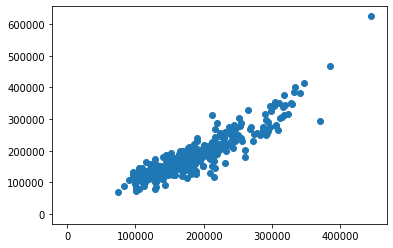

In [1303]:
model_checker(data2, poss_features)

## Revising the model

### Addressing multicollinearity

We start by looking at the correlation between the various feautures explore the issue:

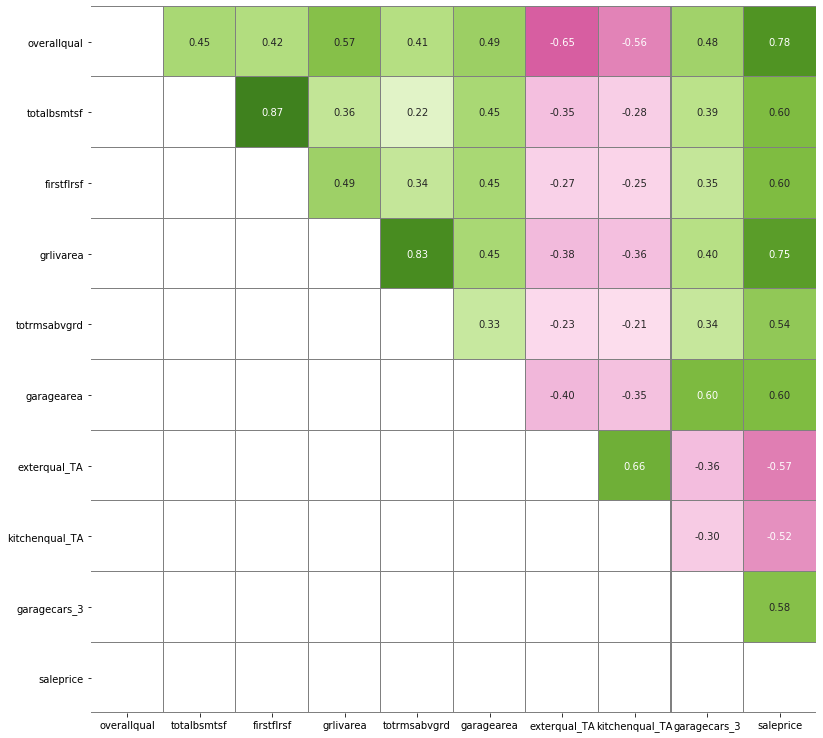

In [1304]:
cols = poss_features + ['saleprice']

matrix = np.tril(data2[cols].corr())

plt.figure(figsize=(13, 13))

ax = sns.heatmap(data2[cols].corr(), annot=True, fmt='.2f', cmap='PiYG',
                 center=0, vmax=1, vmin=-1, cbar = False, mask = matrix, 
                 linecolor='grey', linewidths=0.05)

### Removing high-collinearity categorical features

We can start out by removing the categorical variables that are dummies of the same category. We will pick the one with the higher absolute value correlation with 'saleprice'.

In [1305]:
poss_features

['overallqual',
 'totalbsmtsf',
 'firstflrsf',
 'grlivarea',
 'totrmsabvgrd',
 'garagearea',
 'exterqual_TA',
 'kitchenqual_TA',
 'garagecars_3']

In [1306]:
poss_features.remove('totalbsmtsf')
poss_features.remove('totrmsabvgrd')
poss_features.remove('garagecars_3')
poss_features.remove('exterqual_TA')
poss_features.remove('kitchenqual_TA')
poss_features.remove('overallqual')

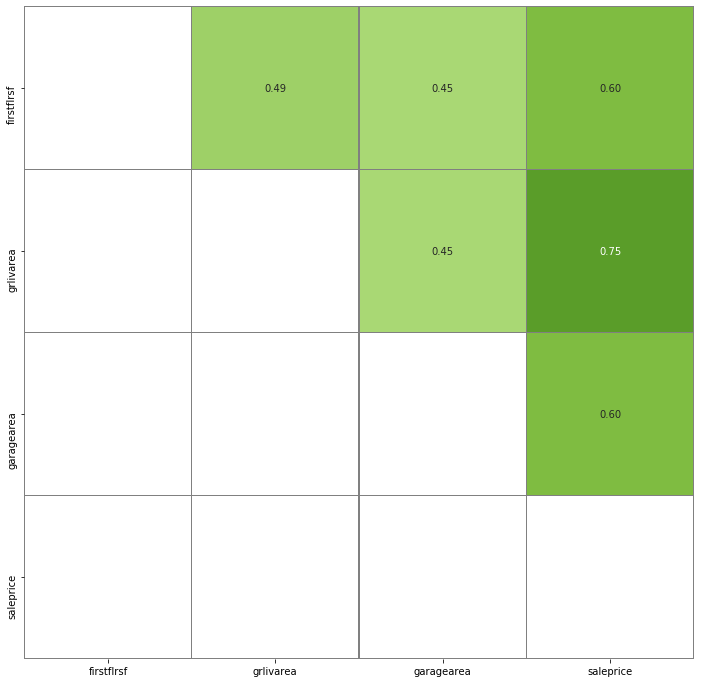

In [1307]:
cols = poss_features + ['saleprice']

matrix = np.tril(data2[cols].corr())

plt.figure(figsize=(12, 12))

ax = sns.heatmap(data2[cols].corr(), annot=True, fmt='.2f', cmap='PiYG',
                 center=0, vmax=1, vmin=-1, cbar = False, mask = matrix, 
                 linecolor='grey', linewidths=0.05)

In [1308]:
def model_checker(data, feautures, return_model = False):
    X = data[poss_features]
    Y = data['saleprice']
    
    #X = sm.add_constant(X)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 13, test_size = 0.33)

    print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
    
    modelv1 = sm.OLS(Y_train, X_train).fit()
    
    Y_pred = modelv1.predict(X_test)
    
    plt.scatter(Y_pred, Y_test)
    x = np.linspace(*ax.get_xlim())
    plt.plot(x, x)
    
    return modelv1.summary()

(723, 3) (357, 3) (723,) (357,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              saleprice   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              5398.
Date:                Tue, 07 Jan 2020   Prob (F-statistic):                        0.00
Time:                        04:15:56   Log-Likelihood:                         -8689.9
No. Observations:                 723   AIC:                                  1.739e+04
Df Residuals:                     720   BIC:                                  1.740e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
firstflrsf    31.3597      4.733      6.626      0.000      22.068      40.651
grlivarea     70.1159      3.482     20.139      0.000      63.281      76.951
garagearea    83.9468      9.661      8.689      0.000      64.980     102.914
==============================================================================
Omnibus:                      265.711   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3123.353
Skew:                           1.303   Prob(JB):                         0.00
Kurtosis:                      12.843   Cond. No.                         13.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

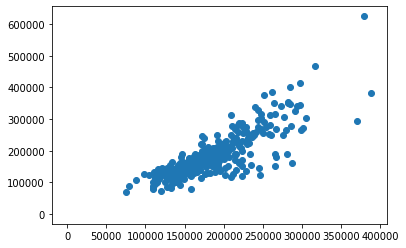

In [1309]:
model_checker(data2, poss_features)